# Introduction to K-means Clustering

In [23]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

In [13]:
# Load data
home_data_df = pd.read_csv('./data/housing.csv')
home_data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
home_data_df.shape

(20640, 10)

In [14]:
# get the info
home_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# get the null values
home_data_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
# Filter columns
usecols = ['longitude', 'latitude', 'median_house_value']
home_data_df=home_data_df[usecols]
home_data_df.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [19]:
home_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


### Visualizing the data

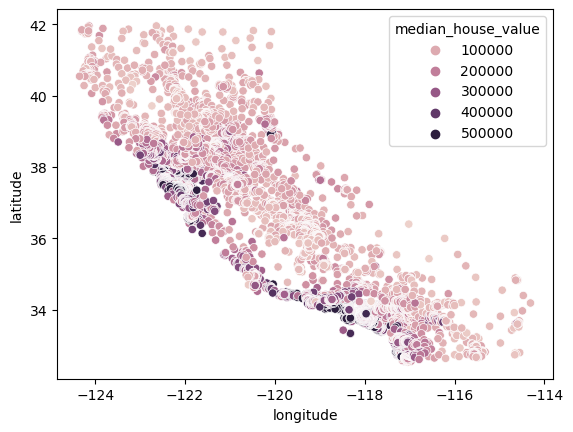

In [22]:
sns.scatterplot(data=home_data_df,x='longitude',y='latitude',hue='median_house_value')
plt.show()

### Normalizing the data

In [24]:
# Split the data
X = home_data_df.drop(['median_house_value'], axis=1)
y = home_data_df['median_house_value']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [25]:
# Normalize the data
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

### Fitting and Evaluating teh Model

In [26]:
kmeans = KMeans(n_clusters=3,random_state=0,n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

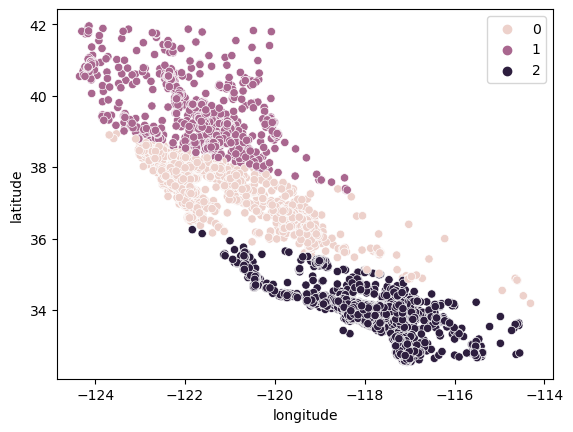

In [27]:
#  Access the labels
labels = kmeans.labels_

# Plot them 
sns.scatterplot(data=X_train,x='longitude',y='latitude',hue=labels)
plt.show()

In [30]:
# Check the evaluation score
silhouette_avg = silhouette_score(X_train_norm,labels,metric='euclidean')

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.7499371920888368


### Choosing the best number of clusters

In [38]:
# using the elbow method

K = range(2,8)
fits =[]
score =[]
for k in K:
    model = KMeans(n_clusters=k,random_state=0,n_init='auto')
    model.fit(X_train_norm)
    
    fits.append(model)
    silhouette_avg_score= silhouette_score(X_train_norm,model.labels_,metric='euclidean')
    
    score.append(silhouette_avg_score)
    
    print(f'K_value: {k}: Score is: {silhouette_avg_score}')
    


K_value: 2: Score is: 0.775412852760147
K_value: 3: Score is: 0.7499371920888368
K_value: 4: Score is: 0.6720696983705419
K_value: 5: Score is: 0.6194278732107203
K_value: 6: Score is: 0.6298291339785339
K_value: 7: Score is: 0.6411527464109644


A silhouette score is a measure used to evaluate the quality of clusters in clustering algorithms. It ranges from -1 to 1, where:

- A score close to 1 indicates that the data points are well-clustered and that the clusters are well-separated from each other.
- A score close to 0 indicates that the data points are on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the data points might have been assigned to the wrong clusters.

### Plotting different K values

<Axes: xlabel='longitude', ylabel='latitude'>

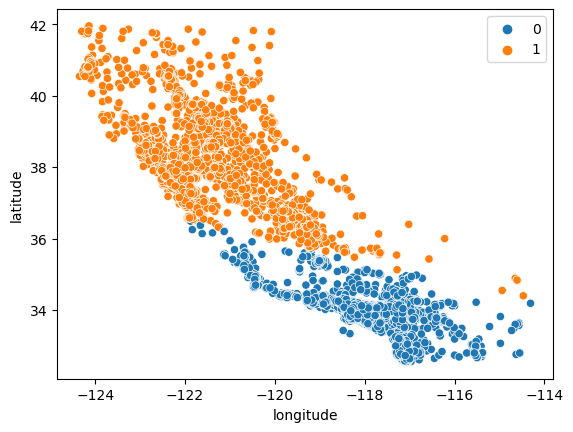

In [39]:
# K = 2
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

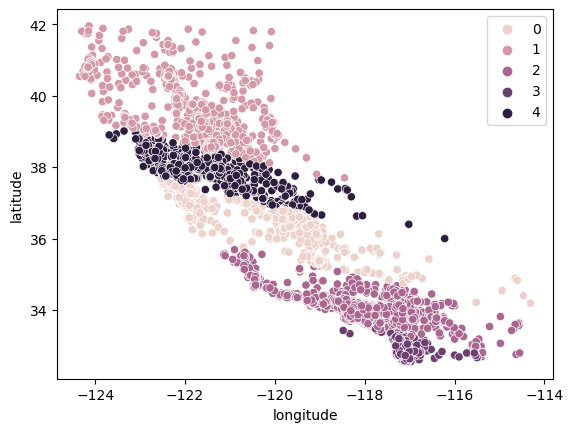

In [40]:
# K = 4
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

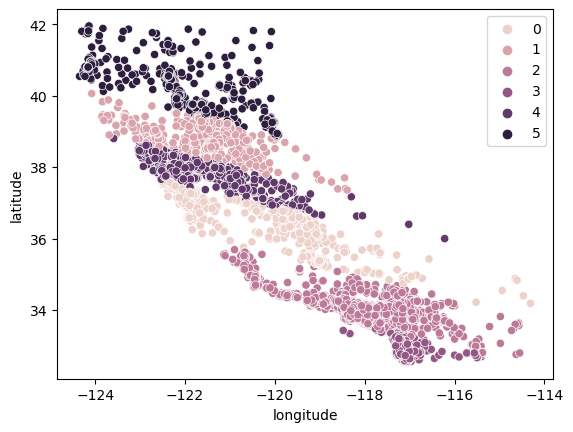

In [43]:
# K = 5
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[4].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

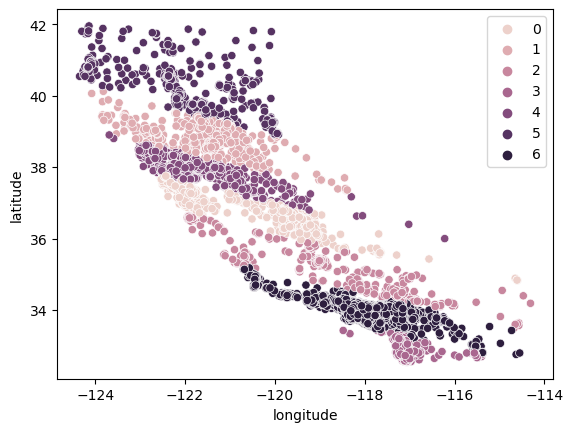

In [42]:
# k = 7
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)

C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wambua\.conda\envs\Automatic111SDU\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


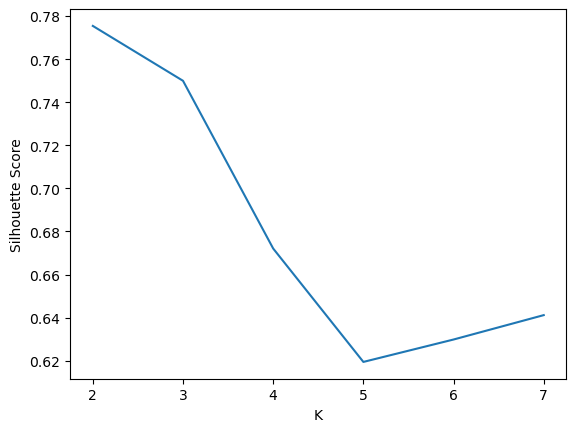

In [46]:
# Elbow plot
sns.lineplot(x=K,y = score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

We typically choose the point where the improvements in performance start to flatten or get worse. We see k = 5 is probably the best we can do without overfitting. 